# Korrelation Steinschlag - Wetter

### Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Daten Importieren

In [2]:
zone_1 = pd.read_csv('./data/out_1.csv', ';')
zone_2 = pd.read_csv('./data/out_2.csv', ';')
weather = pd.read_csv('./data/weather.csv')

/opt/hostedtoolcache/Python/3.10.0/x64/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
display(zone_1.head())
display(zone_2.head())
display(weather.head())

,Datum,Uhrzeit,m [kg],v [m/s]
0,01.01.2019,09:00,194,8.4
1,01.01.2019,21:00,224,8.8
2,02.01.2019,14:00,3104,9.2
3,04.01.2019,15:00,228,8.0
4,05.01.2019,23:00,755,7.0


,Date,Uhrzeit,m [kg],v [m/s]
0,01.01.2019,09:00,38,45.4
1,03.01.2019,06:00,187,41.6
2,04.01.2019,10:00,36,44.6
3,07.01.2019,14:00,6,41.2
4,11.01.2019,06:00,65,39.6


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2019-01-01,1.0,-1.9,2.4,0.0,NaN,73.8,4.0,16.7,1033.5,0.0
1,2019-01-02,0.6,-1.5,2.7,6.4,NaN,2.3,13.9,48.2,1032.7,0.0
2,2019-01-03,-2.6,-4.4,-1.1,0.1,10.0,340.2,5.5,33.3,1039.0,48.0
3,2019-01-04,-3.1,-5.8,-0.4,0.0,20.0,239.8,2.4,14.8,1038.6,6.0
4,2019-01-05,-1.9,-2.7,-1.0,12.4,30.0,154.0,4.8,20.4,1034.7,0.0


## Daten Aufbereiten

In [4]:
zone_1['Date'] = pd.to_datetime(zone_1['Datum'], format='%d.%m.%Y')
zone_2['Date'] = pd.to_datetime(zone_2['Date'], format='%d.%m.%Y')
weather['Date'] = pd.to_datetime(weather['date'], format='%Y-%m-%d')

weather['tdif'] = weather['tmax'] - weather['tmin']

idx = pd.date_range('2019-01-01', '2019-03-30')

combined_zones = pd.concat([zone_1, zone_2])
combined_zones_count = combined_zones['Date'].value_counts().reindex(idx, fill_value=0)

## Visualisierungen

### Durchschnittliche Temperatur über die drei Monaten

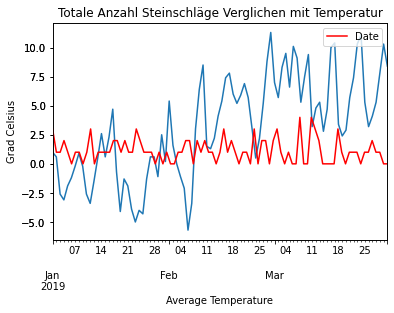

In [5]:
_, ax = plt.subplots()
ax2 = ax.twiny()
ax2.axes.get_xaxis().set_visible(False)
weather.set_index('Date')['tavg'].plot(ylabel='Grad Celsius', xlabel='Average Temperature', ax=ax)
combined_zones_count.plot(color='red', xlabel='Anzahl Steinschläge', ax=ax2)
plt.title('Totale Anzahl Steinschläge Verglichen mit Temperatur')
plt.legend()
plt.show()

Im obenstehenden plot sieht man die Temperatur in Kombination mit der Anzahl Steinschläge. Hier ist keine grosse korellation zu sehen, die Temperatur ansich scheint keinen grossen Einfluss zu haben.

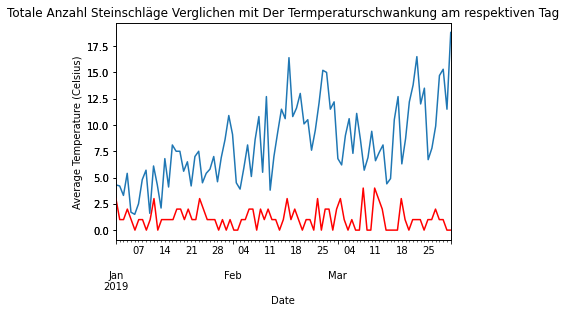

In [6]:
_, ax = plt.subplots()
ax2 = ax.twiny()
ax2.axes.get_xaxis().set_visible(False)
weather.set_index('Date')['tdif'].plot(ylabel='Average Temperature (Celsius)', xlabel='Date', ax=ax)
combined_zones_count.plot(color='red', ax=ax2)
plt.title('Totale Anzahl Steinschläge Verglichen mit Der Termperaturschwankung am respektiven Tag')
plt.show()

Zusätzlich zum oberen Diagramm hier nicht die anzahl Steinschläge im Vergleich zu der Temperaturschwankung am respektiven Tag. Auch hier ist keine direkte Korrelation zu sehen.

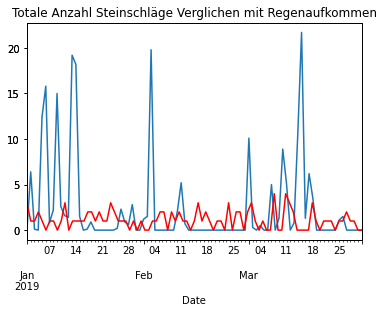

In [7]:
_, ax = plt.subplots()
ax2 = ax.twiny()
ax3 = ax2.twiny()
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
weather.set_index('Date')['prcp'].plot( ax=ax)
combined_zones_count.plot(color='red', ax=ax2, xlabel='Anzahl Steinschläge')
plt.title('Totale Anzahl Steinschläge Verglichen mit Regenaufkommen')
plt.show()

Auch beim Regenfall sehen wir keinen direkten Einfluss auf die Anzahl Steinschläge.

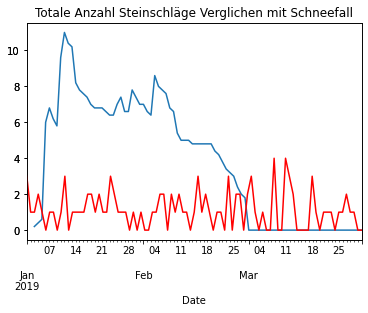

In [8]:
_, ax = plt.subplots()
ax2 = ax.twiny()
ax2.axes.get_xaxis().set_visible(False)
(weather.set_index('Date')['snow'] / 50).plot( ax=ax)
combined_zones_count.plot(color='red', ax=ax2, xlabel='Anzahl Steinschläge')
plt.title('Totale Anzahl Steinschläge Verglichen mit Schneefall')
plt.show()

Beim Vergleich mit dem Schneefall sehen wir eine Leichte Steigung der Anzahl Steinschläge, jedoch nicht genug um auf eine Eindeutige Korrelation hinzudeuten.

Wir gehen daher davon aus dass das Wetter keinen Einfluss auf die Anzahl Steinschläge hat.

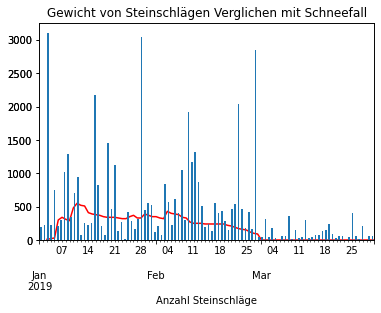

In [9]:
_, ax = plt.subplots()
ax2 = ax.twiny()
ax2.axes.get_xaxis().set_visible(False)
combined_zones.set_index('Date')['m [kg]'].plot(ax=ax2, kind='bar')
weather.set_index('Date')['snow'].plot(color='red', ax=ax, xlabel='Anzahl Steinschläge')
plt.title('Gewicht von Steinschlägen Verglichen mit Schneefall')
plt.show()

Was uns jedoch hier auffällt ist dass Schnee einen Einfluss auf das Gewicht der Steinschläge hat. 